# Aceleradev Codenation - Semana 3
## Túlio Vieira de Souza | Data Scientist

dados : https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

Colunas 

- city : Cidade onde o imóvel está localizada / City where the property is located
- area : Area do imovel / Property area
- rooms: Numero de quartos/ Quantity of rooms
- bathroom: Numero de banheiros / Quantity of bathroom
- parking spaces : Numero de vagas / Quantity of parking spaces
- floor : Andar / Floor
- animal : Aceita animais? / Acept animals?
- furniture : Mobilhada? / Furniture?
- hoa (RS): Valor do condomínio / Homeowners association tax 
- rent amount (RS) : Valor do Aluguel (/) Rent amount 
- property tax (RS) : IPTU (/) Property tax
- fire insurance (RS) : Seguro Incendio / Fire Insurance
- total (RS) : Valor total / Total

### Importando os pacotes

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('houses_to_rent_v2.csv')

In [3]:
df.head(5)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
city                   10692 non-null object
area                   10692 non-null int64
rooms                  10692 non-null int64
bathroom               10692 non-null int64
parking spaces         10692 non-null int64
floor                  10692 non-null object
animal                 10692 non-null object
furniture              10692 non-null object
hoa (R$)               10692 non-null int64
rent amount (R$)       10692 non-null int64
property tax (R$)      10692 non-null int64
fire insurance (R$)    10692 non-null int64
total (R$)             10692 non-null int64
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


# Problema : Explorar o valor do aluguel (rent amount RS)

## Estatística univariada

In [6]:
df.rename(columns = {'rent amount (R$)' : 'valor_aluguel'}, inplace = True)

In [7]:
df['valor_aluguel'].mean()

3896.247194163861

In [8]:
df['valor_aluguel'].median()

2661.0

In [9]:
df['valor_aluguel'].std()

3408.5455176710816

In [10]:
df['valor_aluguel'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

In [11]:
df['valor_aluguel'].plot(kind = 'hist', bins= 100)

In [12]:
#skewness positive skew
df.valor_aluguel.skew()

1.8388773035440982

In [13]:
#kurtose - leptocurtica
df.valor_aluguel.kurtosis()


4.624228179818687

## Exploracao multivariáveis

### Levantamento de hipóteses para direcionar a análise dos dados

- São Paulo é a cidade com o aluguel mais caro.
- Quanto mais banheiros em um imovel maior o valor do aluguel.
- Os imóveis com mobilia tem o aluguel mais alto. 

### A partir das hipóteses, podemos formular algumas perguntas
 
- Qual a cidade com a média de aluguel mais cara? 
- Quantos banheiros existem nas residências com aluguéis mais altos? 
- Os imóveis mais caros aceitam animal? 
- Os imóveis mais caros são mobiliados? 

#### Qual a cidade com a média de aluguel mais alta? 

In [34]:
df.groupby('city')['valor_aluguel'].median().reset_index().sort_values('valor_aluguel', ascending = False)

,city,valor_aluguel
4,São Paulo,3400
0,Belo Horizonte,2300
3,Rio de Janeiro,2300
2,Porto Alegre,1650
1,Campinas,1500


__Resposta__: São Paulo, como sugere a hipótese.

In [35]:
## usaremos a definição: alguéis mais altos são valores acima de 5000

df['aluguel_alto'] = ['Alto' if x > 5000 else 'Baixo' for x in df['valor_aluguel']]

#### Quantos banheiros existem em média nas residências com aluguéis mais altos? 

In [16]:
df.groupby('aluguel_alto')['bathroom'].mean()

aluguel_alto
Alto     3.729027
Baixo    1.772108
Name: bathroom, dtype: float64

In [44]:
# verificando a correção entre 'valor_aluguel' e 'bathroom'
df[['valor_aluguel', 'bathroom']].corr(method = 'spearman') 

# se não passar nenhum parâmetro, retorna o metódo pearson

,valor_aluguel,bathroom
valor_aluguel,1.00000,0.71589
bathroom,0.71589,1.00000


__Resposta__: em média imóveis com aluguéis mais altos possuem aproximadamente 4 banheiros, enquanto os mais baixos possuem 2, além disso a correlação entre valor do aluguel e quantidade de banheiros é de 0,716, ou seja, a hipótese de que aluguéis mais caros possuem mais banheiros é verdadeira (se generalizarmos todos os estados e para esse dataset).



### Análises em aberto - feitas por gabriela

#### Os imóveis mais caros aceitam animais?

In [18]:
df['animal'].value_counts()

acept        8316
not acept    2376
Name: animal, dtype: int64

In [19]:
# Transformando os tipos de dado da coluna 'animal' ('acept' e 'not acept') para números 0 e 1
df['animal_int'] = [0 if x == 'acept' else 1 for x in df['animal']]

In [20]:
df.groupby('aluguel_alto')['animal_int'].value_counts()

aluguel_alto  animal_int
Alto          0             2084
              1              455
Baixo         0             6232
              1             1921
Name: animal_int, dtype: int64

In [42]:
# verificando a correção entre 'valor_aluguel' e 'animal_int'
df[['valor_aluguel', 'animal_int']].corr(method = 'spearman')

,valor_aluguel,animal_int
valor_aluguel,1.000000,-0.082569
animal_int,-0.082569,1.000000


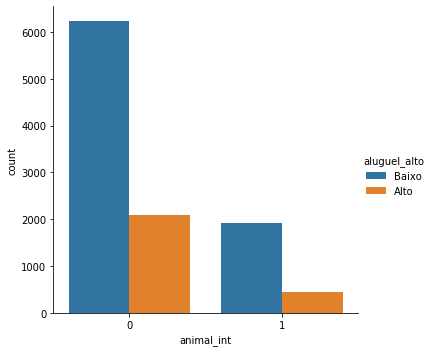

In [35]:
# eixo x: 0 --> aceita animais
#         1 --> não aceita animais
sns.factorplot('animal_int', data=df, hue='aluguel_alto', kind='count')

__Resposta__: em ambos os casos, os animais são prenominantemente aceitos. A correlação entre o valor do aluguel e o animais deu, em módulo, 0,08, valor muito baixo. Então não é um bom parâmetro para distinguir aluguéis altos dos baixos.

#### Os imóveis mais caros são mobiliados?

In [46]:
df['furniture'].value_counts()

not furnished    8086
furnished        2606
Name: furniture, dtype: int64

In [47]:
# Novamente vamos transformar as strings 'not furnished' e 'furnished' nos valores 0 e 1.
df['furniture_int'] = [0 if x == 'not furnished' else 1 for x in df['furniture']]

In [48]:
df.groupby('aluguel_alto')['furniture_int'].value_counts()

aluguel_alto  furniture_int
Alto          0                1661
              1                 878
Baixo         0                6425
              1                1728
Name: furniture_int, dtype: int64

In [49]:
# verificando a correção entre 'valor_aluguel' e 'animal_int'
df[['valor_aluguel', 'furniture_int']].corr(method = 'spearman')

,valor_aluguel,furniture_int
valor_aluguel,1.00000,0.21823
furniture_int,0.21823,1.00000


C:\Users\Home\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


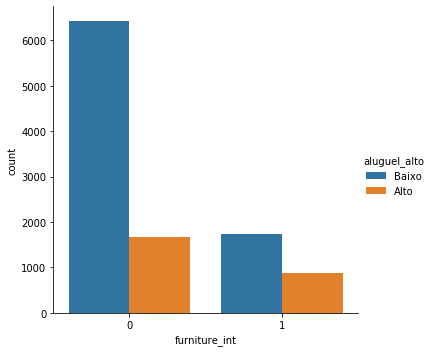

In [50]:
# eixo x: 0 --> não mobiliado
#         1 --> mobiliado
sns.factorplot('furniture_int', data=df, hue='aluguel_alto', kind='count')

__Resposta__: a maioria dos imóveis do _dataset_ não são mobiliados. A correlação entre eles é baixa (0,22), ou seja, não há muita influência no preço o imóvel ser mobiliado ou não.

#### Fim gabi

### Generalizando as correlações 

In [29]:
aux = pd.DataFrame({'colunas' : df.columns, 'tipos' : df.dtypes})

In [33]:
lista = list(aux[aux['tipos'] == 'int64']['colunas'])

In [31]:
# ver todas as correlações que possuem o tipo inteiro
for coluna in lista:
    print(coluna)
    print(df[['valor_aluguel', coluna]].corr(method = 'spearman'))

area
               valor_aluguel      area
valor_aluguel       1.000000  0.728095
area                0.728095  1.000000
rooms
               valor_aluguel     rooms
valor_aluguel       1.000000  0.600969
rooms               0.600969  1.000000
bathroom
               valor_aluguel  bathroom
valor_aluguel        1.00000   0.71589
bathroom             0.71589   1.00000
parking spaces
                valor_aluguel  parking spaces
valor_aluguel        1.000000        0.620175
parking spaces       0.620175        1.000000
hoa (R$)
               valor_aluguel  hoa (R$)
valor_aluguel       1.000000  0.355785
hoa (R$)            0.355785  1.000000
valor_aluguel
               valor_aluguel  valor_aluguel
valor_aluguel            1.0            1.0
valor_aluguel            1.0            1.0
property tax (R$)
                   valor_aluguel  property tax (R$)
valor_aluguel            1.00000            0.65923
property tax (R$)        0.65923            1.00000
fire insurance (R$)
          

## Visualização de dados

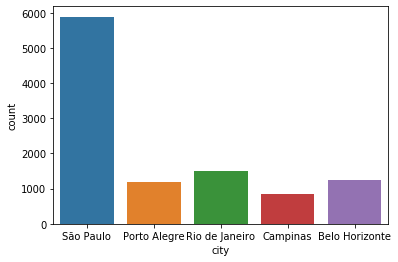

In [52]:
sns.countplot(x = 'city', data = df)

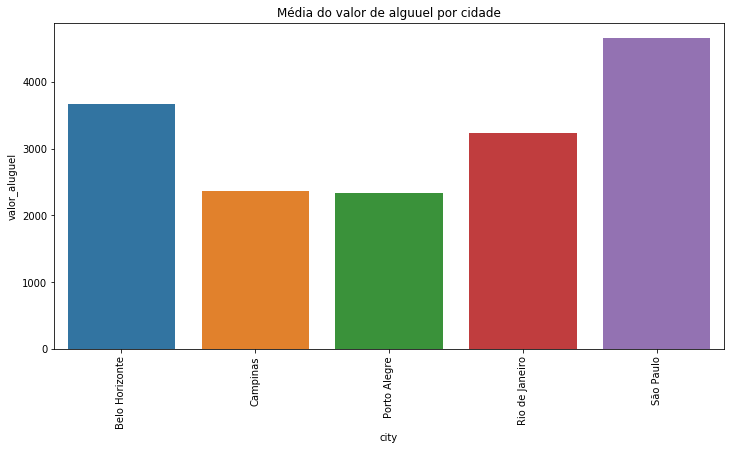

In [60]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'city', y = 'valor_aluguel', data = df.groupby('city')['valor_aluguel'].mean().reset_index())
plt.title('Média do valor de alguuel por cidade')
plt.xticks(rotation = 90)
plt.show()

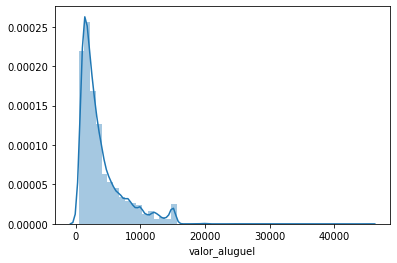

In [61]:
sns.distplot(df['valor_aluguel'])

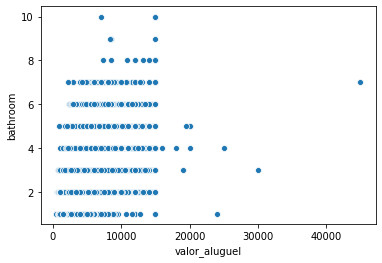

In [62]:
sns.scatterplot(x = 'valor_aluguel', y = 'bathroom', data = df)

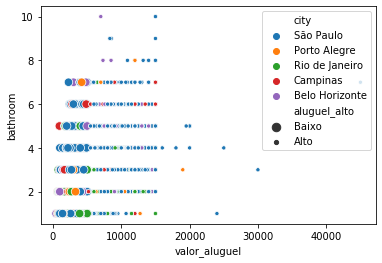

In [65]:
sns.scatterplot(x = 'valor_aluguel', y = 'bathroom', hue='city', size='aluguel_alto', data = df)

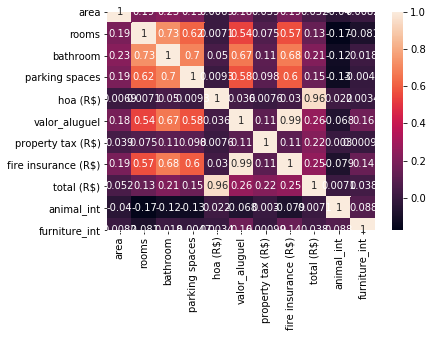

In [67]:
sns.heatmap(df.corr(), annot = True)

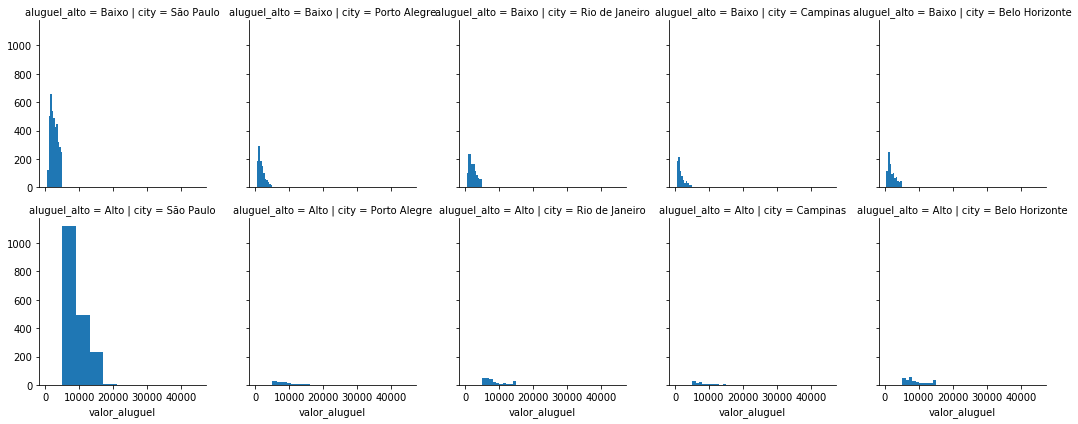

In [70]:
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
g = sns.FacetGrid(df, col="city",  row="aluguel_alto")
g = g.map(plt.hist, "valor_aluguel")